## Titanic Dataset

- Classification
- Data Cleaning
- Data filling

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [19]:
pwd

'C:\\Users\\Selva Kumar E\\Desktop'

In [20]:
titanic = pd.read_csv("titanic_train.csv")

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Feature Selection

<AxesSubplot:>

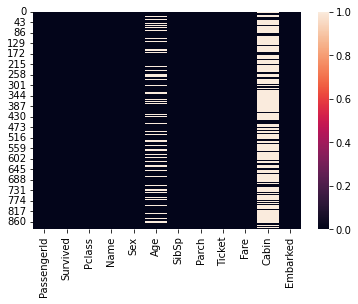

In [24]:
sns.heatmap(titanic.isnull())

In [25]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
titanic.drop(['PassengerId','Cabin','Name','Ticket','Fare'],axis=1)#temporary

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [27]:
titanic.drop(['PassengerId','Cabin','Name','Ticket','Fare'],axis=1,inplace=True)#permanately

### Convert from Categorical into Numerical 

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [30]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [32]:
embark=pd.get_dummies(titanic['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [33]:
titanic.pop('Sex')
titanic.pop('Embarked')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [35]:
titanic=pd.concat([titanic,gender,embark],axis=1)

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


In [44]:
titanic

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,1
887,1,1,19.0,0,0,0,0,1
888,0,3,NaN,1,2,0,0,1
889,1,1,26.0,0,0,1,0,0


In [45]:
titanic[titanic['Pclass']==1]['male']

1      0
3      0
6      1
11     0
23     1
      ..
871    0
872    1
879    0
887    0
889    1
Name: male, Length: 216, dtype: uint8

### Exploratary Data Analysis

<AxesSubplot:xlabel='male', ylabel='count'>

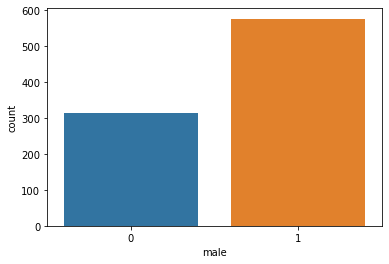

In [46]:
sns.countplot(data=titanic,x='male')

<AxesSubplot:xlabel='Survived', ylabel='count'>

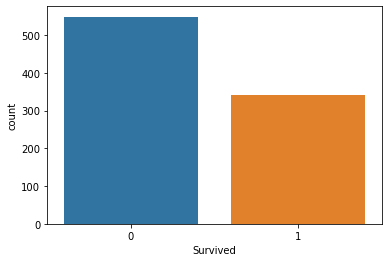

In [50]:
sns.countplot(data=titanic,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

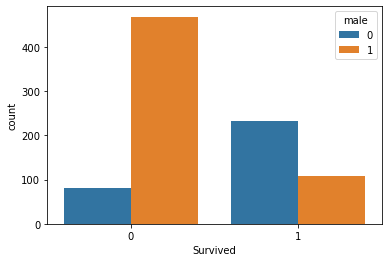

In [48]:
sns.countplot(data=titanic,x='Survived',hue='male')

<AxesSubplot:xlabel='Survived', ylabel='count'>

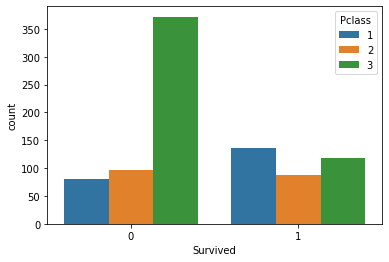

In [52]:
sns.countplot(data=titanic,x='Survived',hue='Pclass')

### Cleaned data

In [39]:
titanic.to_csv('final_train.csv')

### Filling the Null values

<AxesSubplot:>

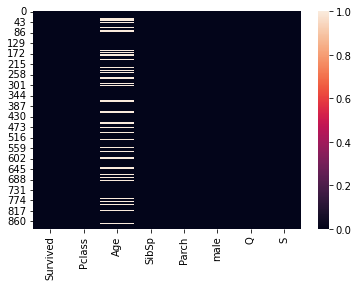

In [37]:
sns.heatmap(titanic.isnull())

In [40]:
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

In [41]:
titanic[titanic['Pclass']==2]['Age'].mean()

29.87763005780347

In [42]:
titanic[titanic['Pclass']==3]['Age'].mean()

25.14061971830986

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

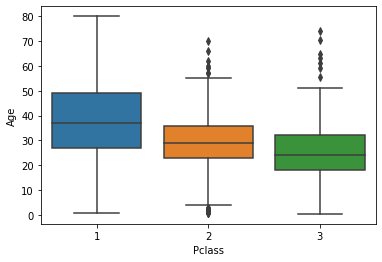

In [43]:
# m1 =38 m2 =30 m3 =25
sns.boxplot(data=titanic,x='Pclass',y='Age')

In [55]:
def clean_data(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else :
            return 25
    else:
        return Age           

In [56]:
titanic['Age']=titanic[['Age','Pclass']].apply(clean_data,axis=1)

<AxesSubplot:>

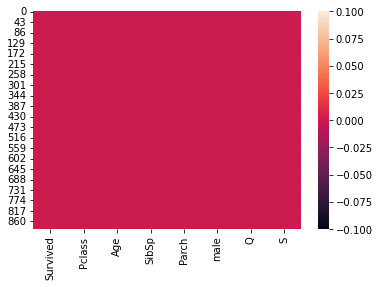

In [57]:
sns.heatmap(titanic.isnull())

In [63]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S'], dtype='object')

### Applied Classification model
#### Formula
- Logistic Regression : y = e^-(mx+c)

In [64]:
x=titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'Q', 'S']]
y=titanic['Survived']

In [65]:
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
lr=LogisticRegression()

In [67]:
lr.fit(x,y)

LogisticRegression()

In [70]:
pr=lr.predict(x_test)

### Evalution Metrics

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [71]:
accuracy_score(y_test,pr)

0.8059701492537313

In [72]:
confusion_matrix(y_test,pr)

array([[140,  23],
       [ 29,  76]], dtype=int64)

In [79]:
print('Accuracy:',(140+76)/(140+23+29+76))

Accuracy: 0.8059701492537313


<AxesSubplot:>

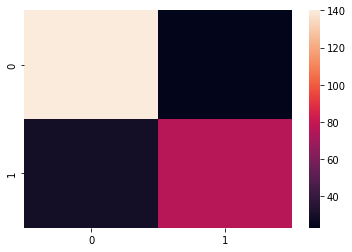

In [73]:
sns.heatmap(confusion_matrix(y_test,pr))

In [76]:
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       163
           1       0.77      0.72      0.75       105

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268

